# **Sun Path**

## **Polar Plot**

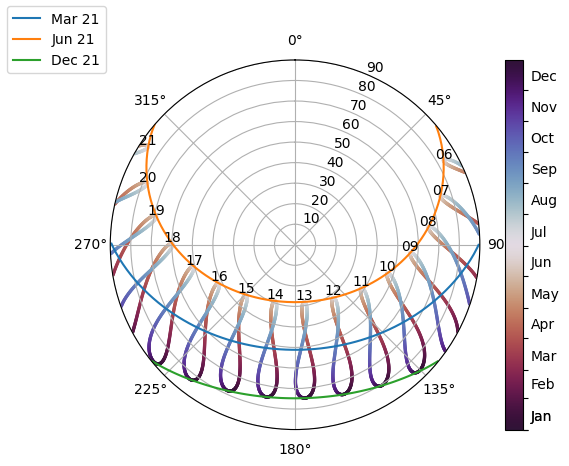

In [17]:
from pvlib import solarposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the timezone and coordinates for the location
tz = 'Europe/Berlin'
lat, lon = 51.401944, 10.737222

times = pd.date_range('2025-01-01 00:00:00', '2026-01-01', freq='h', tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)
# remove nighttime
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

ax = plt.subplot(1, 1, 1, projection='polar')
# draw the analemma loops
points = ax.scatter(np.radians(solpos.azimuth), solpos.apparent_zenith,
                    s=2, label=None, c=solpos.index.dayofyear,
                    cmap='twilight_shifted_r')
# add and format colorbar
cbar = ax.figure.colorbar(points)
times_ticks = pd.date_range('2019-01-01', '2020-01-01', freq='MS', tz=tz)
cbar.set_ticks(ticks=times_ticks.dayofyear, labels=[], minor=False)
cbar.set_ticks(ticks=times_ticks.dayofyear+15,
               labels=times_ticks.strftime('%b'),
               minor=True)
cbar.ax.tick_params(which='minor', width=0)

# draw hour labels
for hour in np.unique(solpos.index.hour):
    # choose label position by the smallest radius for each hour
    subset = solpos.loc[solpos.index.hour == hour, :]
    r = subset.apparent_zenith
    pos = solpos.loc[r.idxmin(), :]
    ax.text(np.radians(pos['azimuth']), pos['apparent_zenith'],
            str(hour).zfill(2), ha='center', va='bottom')

# draw individual days
for date in pd.to_datetime(['2019-03-21', '2019-06-21', '2019-12-21']):
    times = pd.date_range(date, date+pd.Timedelta('24h'), freq='5min', tz=tz)
    solpos = solarposition.get_solarposition(times, lat, lon)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%b %d')
    ax.plot(np.radians(solpos.azimuth), solpos.apparent_zenith, label=label)

ax.figure.legend(loc='upper left')

# change coordinates to be like a compass
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(90)

plt.show()

- polar plot of hourly solar elevation and azimuth
- azimuth is counted clockwise from north, elevation is position of sun over horizon and zenith is 90° - elevation
- solid colored lines show single-day sun paths 
- sun rises north east in summer, east in spring/ autumn and south east in winter
- sun sets north west in summer, west in spring/ authm and south west in winter 

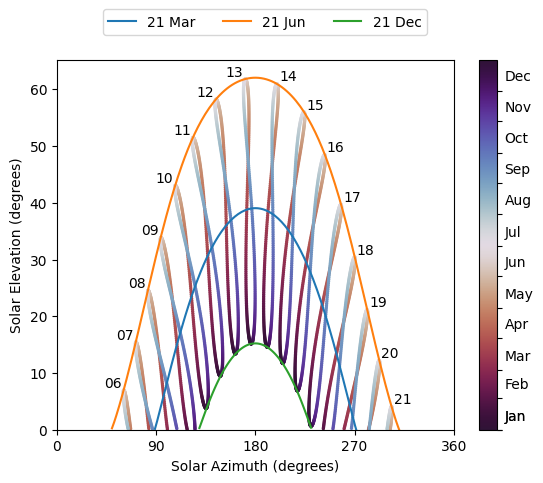

In [ ]:
times = pd.date_range('2025-01-01 00:00:00', '2026-01-01', freq='h', tz=tz)

solpos = solarposition.get_solarposition(times, lat, lon)
# remove nighttime
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

fig, ax = plt.subplots()
points = ax.scatter(solpos.azimuth, solpos.apparent_elevation, s=2,
                    c=solpos.index.dayofyear, label=None,
                    cmap='twilight_shifted_r')
# add and format colorbar
cbar = fig.colorbar(points)
times_ticks = pd.date_range('2025-01-01', '2026-01-01', freq='MS', tz=tz)
cbar.set_ticks(ticks=times_ticks.dayofyear, labels=[], minor=False)
cbar.set_ticks(ticks=times_ticks.dayofyear+15,
               labels=times_ticks.strftime('%b'),
               minor=True)
cbar.ax.tick_params(which='minor', width=0)

for hour in np.unique(solpos.index.hour):
    # choose label position by the largest elevation for each hour
    subset = solpos.loc[solpos.index.hour == hour, :]
    height = subset.apparent_elevation
    pos = solpos.loc[height.idxmax(), :]
    azimuth_offset = -10 if pos['azimuth'] < 180 else 10
    ax.text(pos['azimuth']+azimuth_offset, pos['apparent_elevation'],
            str(hour).zfill(2), ha='center', va='bottom')

for date in pd.to_datetime(['2025-03-21', '2025-06-21', '2025-12-21']):
    times = pd.date_range(date, date+pd.Timedelta('24h'), freq='5min', tz=tz)
    solpos = solarposition.get_solarposition(times, lat, lon)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%d %b')
    ax.plot(solpos.azimuth, solpos.apparent_elevation, label=label)

ax.figure.legend(loc='upper center', bbox_to_anchor=[0.45, 1], ncols=3)
ax.set_xlabel('Solar Azimuth (degrees)')
ax.set_ylabel('Solar Elevation (degrees)')
ax.set_xticks([0, 90, 180, 270, 360])
ax.set_ylim(0, None)

plt.show()